<div class="jumbotron text-left"><b>
This tutorial describes how to use Polynomial Chaos Expansion to perform a global variance-based sensitivity analysis by computing the Sobol indices.</b></div>

Nathalie BARTOLI ONERA/DTIS/M2CI 

Sylvain DUBREUIL ONERA/DTIS/M2CI

Februray 2022


<p class="alert alert-success" style="padding:1em">
To use this notebook, openTurns needs to be installed via http://openturns.github.io/openturns/latest/install.html
</p>


conda config --add channels conda-forge


conda install openturns


For `google colab`: add a code cell with the following command

!pip install openturns

The objective is to study the sensitivity of the
quantity of interest $F$ to the random input parameter $X$ via
 a global sensitivity analysis by computing variance based
sensitivity indices. Consequently, it is assumed that
$X$ is a vector of $d$ independent random variables and $F$ is a random variable of unknown probability
distribution.
$$F: \mathbb{R}^d \rightarrow \mathbb{R}$$

For the purpose of explanation the notation $X_i$ indicates the $i$-th element of a random vector ${X}$, meanwhile the short notation $X_{\sim i}$ is used to indicate all the input variables but $X_i$.
The number of input variables, that is the size of $X$, is indicated by $d$; finally $Y = {F}(X)$ represents a scalar output, computed with a generic black box solver indicated as ${F}$.

The first order sensitivity indices are defined: they are the ratio between the reduction in
variance when a variable $X_i$ is fixed and the total variance.
$$
s_i = \frac{Var_{X_{i}}\left[E_{X_{\sim i}}\left(Y|X_i\right)\right]}{Var\left(Y\right)}
$$
where $E$ represents the expected value, ${Var\left(Y\right)}$ is the variance, and 
 the term $Var_{X_{i}}\left[E_{X_{\sim i}}\left(Y|X_i\right)\right]$ is the estimated reduction in variance when the parameter $X_i$ is fixed. 

The first sensitivity indices  quantify the reduction in variance if the variable $X_i$ is fixed, and vary between 0 and 1 to give an indication about the relative importance of inputs on a given output.

- The considerations above can be rephrased saying that if the sum of the first order indices is
equal to 1, the model is additive and minor order interactions between variables are meaningless.

- On the contrary, if the sum is smaller than one, then the weight of interactions between
input variables is not negligible in the total variance of the response and these interactions
need to be investigated more precisely.

Since in practice it might be difficult to consider all the
orders, the notion of total indices is used. They are defined as

$$
s_{T_{i}} = \frac{E_{X_{\sim i}}\left[Var_{X_{i}}\left(Y|X_{\sim i}\right)\right]}{Var\left(Y\right)}
$$
and represent the expected variance that would be left if all inputs but $X_i$ could be fixed. 
With the help of the total sensitivity indices, it is possible to get the interaction between the
input parameters.

Classical methods to estimate these sensitivity indices are based on sampling strategies (McKay 1997, Sobol 93,  Cukier 1975). The method described in the following is based on an approximation of the output by polynomial chaos expansion (PCE) and was introduced by Sudret in 2008. Interest of this approach is its efficiency in terms of numerical cost in the context of our study (low number of input variables
and smooth mapping between inputs and outputs) compared to sampling strategies.
This approach has been further improved in (Blatman and Sudret 2010) using sparse PCE and will be used in
the following.

Assuming that $Y=F(X)$ is a second-order
random variable, it can be shown (Cameron and Martin 1947) that:
$$ Y=F(X) = \sum_{j=0}^{\infty}a_j \Psi_j(X)$$
($L^2$ convergence), where $\{\Psi_j\}_{j\in \mathbf{N}}$ is a polynomial basis orthogonal with respect
to the probability distribution of $X$ and $a_j$ are unknown coefficients.


The polynomial basis depends on the distribution of $X$ (given by Tryoen PhD 2011 and by Openturns documentation)
![10_PCE_SOBOL/polynome.PNG](polynome.PNG)
![10_PCE_SOBOL/PCE_basis.PNG](PCE_basis.PNG)

Normally, this sum is truncated to $N+1$ terms
$$ \hat F(X) = \sum_{j=0}^{N}a_j \Psi_j(X)$$

where $$ N + 1 = \frac{(p+d)!}{p! d!}$$ 
if $p$ is the degree of the polynomial basis.

The number of terms can also be reduced by using sparce PCE to have

$$ \hat F(X) = \sum_{\alpha \in {\cal{A}}}a_\alpha \Psi_\alpha(X)$$
where $\mathrm{card}({\cal{A}}) \ll N$.

Sparse PCE consists in the construction of a sparse polynomial basis $\{\Psi_\alpha\}_{\alpha  \in {\cal{A}}}$ where $\alpha = (\alpha_1, \cdots, \alpha_d)$ is a multiindex
used to identify the polynomial acting with the power
$\alpha_i$ on the variable $X_i$. We have $\sum_{i=1}^{d}|\alpha_i|=p$ where $p$ is the degree of the polynomial $\Psi_\alpha$

In the present case, this is achieved by Least Angle Regression (LAR),
i.e., unknown coefficients $a_i$ are computed by iteratively
solving a mean square problem and selecting, at each iteration,
the polynomial which is the most correlated with the
residual (see Blatman and Sudret (2011) for details).

Then by using the basis orthogonality, the quantity $\hat F(X)$ is completely determined.

It should be noted that in practice, identification of the unknown coefficients by LAR requires the evaluation of the function $F$ on a given design of experiments sampled from the input space.

Due to the orthogonality of the polynomial basis $\{\Psi_\alpha\}$ it is possible to write the expectation and the variance in the following form:

$$
\left \{
\begin{array}{l}
E[\hat F]= a_0\\
Var[\hat F] =\sum_{\alpha \in {\cal{A}}}a^2_\alpha E[\Psi^2_\alpha(X)]
\end{array} \right.
$$
where $E [\hat F]$ is the mean value and $Var[\hat F]$ is the variance of the output variable $\hat F$. 

In addition, the idea pointed out in Sudret (2008) is to identify the PCE with the ANOVA decomposition, from
which one can show that, the first-order sensitivity index of the variable $X_i$ reads:
$$
	\hat{S}_i = \frac{\sum_{\alpha \in L_i}a^2_{\alpha}E[\phi_{\alpha}^2(X)]}{  Var[\hat{F}]}
$$ 
where $L_i=\left\lbrace \alpha\in\mathcal{A},~ \forall~j\neq i~\alpha_j=0 \right\rbrace$, i.e. only the polynomials acting exclusively on the variable $X_i$ are considered. 
	
The total sensitivity index is also available by, 
	$$
	\hat{S}_{T_i} = \frac{\sum_{\alpha \in L^+_i}a^2_{\alpha}E[\phi_{\alpha}^2(X)]}{Var[\hat{F}]}
	$$
where $L^{+}_i=\left\lbrace \alpha\in\mathcal{A},~ \alpha_i\neq 0 \right\rbrace$ {i.e.} all the polynomials acting on the variable $X_i$ are considered (allows to consider interactions between $X_i$ and the other variables). 
	
One can note that the approximation of the sensitivity index obtained by sparse PCE relies on an accurate approximation of the model response by the sparse PCE, however the link between the accuracy of the PCE approximation and the accuracy of the approximated sensitivity index is not straightforward. In order to access the quality of the sensitivity index computed by PCE, a bootstrap approach proposed in Dubreuil 2014 is set up and detailed in the next section.
	

# References

Cameron, R. H., & Martin, W. T. (1947). The orthogonal development of non-linear functionals in series of Fourier-Hermite functionals. Annals of Mathematics, 385-392.

Cukier, R. I., Schaibly, J. H., & Shuler, K. E. (1975). Study of the sensitivity of coupled reaction systems to uncertainties in rate coefficients. III. Analysis of the approximations. The Journal of Chemical Physics, 63(3), 1140-1149.

Sobol, I. M. (1993). Sensitivity estimates for nonlinear mathematical models. Mathematical modelling and computational experiments, 1(4), 407-414.

McKay, M. D. (1997). Nonparametric variance-based methods of assessing uncertainty importance. Reliability engineering & system safety, 57(3), 267-279.

Saltelli, A., Tarantola, S., Campolongo, F., & Ratto, M. (2004). Sensitivity analysis in practice: a guide to assessing scientific models. Chichester, England.

Sudret, B. (2008). Global sensitivity analysis using polynomial chaos expansions. Reliability engineering & system safety, 93(7), 964-979.

Blatman, G., & Sudret, B. (2010). Efficient computation of global sensitivity indices using sparse polynomial chaos expansions. Reliability Engineering & System Safety, 95(11), 1216-1229.

Tryoen, J. (2011). Méthodes de Galerkin stochastiques adaptatives pour la propagation d'incertitudes paramétriques dans les modèles hyperboliques (Doctoral dissertation, Université Paris-Est).


# 1. Example on the Ishigami function (from OpenTurns documentation)

# Create a polynomial chaos for the Ishigami function

In this example, we create a polynomial chaos for the Ishigami function. We create a sparse polynomial with maximum total degree equal to 8. 
For this analytical example, the Sobol indices are known and can be compared with the computed ones from PCE.




Let $a=7$ and $b=0.1$. We consider the function 

$$
g(X_1,X_2,X_3) = \sin(X_1)+a \sin (X_2)^2 + b X_3^4 \sin(X_1)
$$

for any $X_1,X_2,X_3\in[-\pi,\pi]$ 

We assume that the random variables $X_1,X_2,X_3$ are independent and have the uniform marginal distribution in the interval from $-\pi$ to $\pi$:

$$
X_1,X_2,X_3\sim \mathcal{U}(-\pi,\pi).
$$


This leads to the following first order Sobol' indices:

$$
S_1 = \frac{V_1}{V(Y)}, \qquad S_2 = \frac{V_2}{V(Y)}, \qquad S_3 = 0,
$$

and the following total order indices:

$$
ST_1 = \frac{V_1+V_{1,3}}{V(Y)}, \qquad ST_2 = S_2, \qquad ST_3 = \frac{V_{1,3}}{V(Y)}.
$$


The third variable $X_3$ has no effect at first order (because $X_3^4$ it is multiplied by $\sin(X_1)$), but has a total effet because of the interactions with $X_1$. On the other hand, the second variable $X_2$ has no interaction which implies that the first order indice is equal to the total order indice for this input variable.

## References

* Ishigami, T., & Homma, T. (1990, December). An importance quantification technique in uncertainty analysis for computer models. In Uncertainty Modeling and Analysis, 1990. Proceedings., First International Symposium on (pp. 398-403). IEEE.

* Sobol', I. M., & Levitan, Y. L. (1999). On the use of variance reducing multipliers in Monte Carlo computations of a global sensitivity index. Computer Physics Communications, 117(1), 52-61.

* Saltelli, A., Chan, K., & Scott, E. M. (Eds.). (2000). Sensitivity analysis (Vol. 134). New York: Wiley.

* Crestaux, T., Martinez, J.-M., Le Maitre, O., & Lafitte, O. (2007). Polynomial chaos expansion for uncertainties quantification and sensitivity analysis. SAMO 2007, http://samo2007.chem.elte.hu/lectures/Crestaux.pdf.

## Define the model

In [1]:
import openturns as ot
import numpy as np

import os#.path as pth
import openmdao.api as om
from fastoad import api
import logging
import shutil
import time
import warnings
from scipy import constants
from Add_functions import generate_configuration_file
warnings.simplefilter(action='ignore')
pth =os.path
from fastoad.io import VariableIO
from fastoad.utils.physics import Atmosphere


Unable to import mpi4py. Parallel processing unavailable.
Unable to import petsc4py. Parallel processing unavailable.
Unable to import petsc4py. Parallel processing unavailable.


Create the Ishigami test function.

In [2]:
ng = "TPAD_hybrid_uncertainty_HTPEM_hyb_desc"
#specify here the data and the workdir directory used by FASTOAD
DATA_FOLDER_PATH = "data"
WORK_FOLDER_PATH = "workdir"

print("Function ", ng)
RESULTS_FOLDER_PATH = "workdir/" + ng + "/"
base_save = ng

#os.mkdir(RESULTS_FOLDER_PATH)


def fast_launcher(inputs):
    CONFIGURATION_FILE = generate_configuration_file(RESULTS_FOLDER_PATH, pth.join(WORK_FOLDER_PATH, 'RHEA_TPAD_sizing_PHFC_new.toml'))
    SOURCE_FILE = pth.join(RESULTS_FOLDER_PATH+'/data', 'problem_outputs.xml')
    data=VariableIO(SOURCE_FILE).read() 


    data["data:propulsion:electric_systems:cables:length"].value        = inputs[0]
    data["data:propulsion:electric_systems:H2_distribution:pipes_length"].value        = inputs[1]
    data["data:propulsion:electric_systems:motor:motor_eta"].value        = inputs[2]
    data["data:propulsion:electric_systems:motor:specific_power"].value        = inputs[3]
    data["data:propulsion:electric_systems:power_electronics:power_electronics_eta"].value        = inputs[4]
    data["data:propulsion:electric_systems:power_electronics:specific_power"].value        = inputs[5]  
    
    data["tuning:propulsion:electric_systems:H2_storage:k_length"].value        = inputs[6]  
    data["tuning:propulsion:electric_systems:H2_storage:k_eta"].value        = inputs[7]  
    data["tuning:propulsion:electric_systems:cooling:k_mass"].value        = inputs[8]     
    data["tuning:propulsion:electric_systems:fuel_cell:k_sp"].value        = inputs[9]  
    data["tuning:propulsion:electric_systems:fuel_cell:k_eta"].value        = inputs[10] 
    #check relations between h2 consumption and efficiency before modifyng the code
    
    VariableIO(SOURCE_FILE).write(data)  

    api.generate_inputs(CONFIGURATION_FILE, SOURCE_FILE, overwrite=True)

    eval_problem = api.evaluate_problem(CONFIGURATION_FILE, overwrite=True)
    RESULT_FILE = pth.join(RESULTS_FOLDER_PATH,'problem_outputs.xml' )
    output_data = VariableIO(RESULT_FILE).read()
    
    BF_pax = np.asarray(output_data["data:mission:sizing:block_fuel_pax_gross"].value) 
    payload = np.asarray(output_data["data:weight:aircraft:payload"].value) 
    max_payload = np.asarray(output_data["data:weight:aircraft:max_payload"].value) 
    BF = np.asarray(output_data["data:mission:sizing:block_fuel"].value) 
    BF_pax_cont= BF/max_payload*95
    H2_tank_length = np.asarray(output_data["data:propulsion:electric_systems:H2_storage:length"].value) 
    H2_tank_volume = np.asarray(output_data["data:propulsion:electric_systems:H2_storage:volume"].value) 
    H2_tank_diam = np.asarray(output_data["data:propulsion:electric_systems:H2_storage:diameter"].value) 
    H2 = np.asarray(output_data["data:mission:sizing:H2"].value) 
    OWE=np.asarray(output_data["data:weight:aircraft:OWE"].value) 

    return (BF_pax, payload, BF_pax_cont, max_payload, BF,H2_tank_length, H2_tank_volume, H2_tank_diam,H2,OWE )

Function  TPAD_hybrid_uncertainty_HTPEM_hyb_desc


In [3]:
BF_pax = fast_launcher([30,50,0.97,7000,0.98,11000,1,1,1,1.,1])
print(BF_pax)

no previous fail to remove
-------------------------------------------
-------------------------------------------
-------------------------------------------
-------------------------------------------
-------------------------------------------
-------------------------------------------
speeds found
TODn =  0.0 1.15*TODn =  0.0
VR =  0.0
TO_power  [1907.13278774] BFL  [1279.35492954]
start main mission [23572.]
END main mission [23572.]
Cruise mach is greater then max cruise mach. Max cruise mach will be used in cruise 0.39004300269110304
Cruise mach is greater then max cruise mach. Max cruise mach will be used in cruise 0.39004300269110304
Cruise mach is greater then max cruise mach. Max cruise mach will be used in cruise 0.39004300269110304
NL: NLBGSSolver 'NL: NLBGS' on system '': residuals contain 'inf' or 'NaN' after 1 iterations.
(array([4.4966836]), array([5985.]), array([4.46841672]), array([6022.86067331]), array([283.29106691]), array([3.09634554]), array([5.35419324]), ar

Create the probabilistic model

In [4]:

distributionList = [ot.Uniform(20, 50), #cables:length
                    ot.Uniform(30, 70), #pipes_length
                   ot.Uniform(0.95, 1), #motor_eta
                   ot.Uniform(5000, 10000), #motor:specific_power
                   ot.Uniform(0.95, 1), # power_electronics_eta
                   ot.Uniform(7000, 15000), # power_electronics:specific_power
                   ot.Uniform(0.8, 1.2), #H2_storage:k_length
                   ot.Uniform(0.7, 1), #H2_storage:k_eta
                   ot.Uniform(0.8, 1.2), #cooling:k_mass
                   ot.Uniform(0.8, 1.2), # fuel_cell:k_sp
                   ot.Uniform(0.95, 1.05)] # fuel_cell:k_eta
distribution = ot.ComposedDistribution(distributionList)


## Sample the  function and create the database

In [5]:
n = 11 # number of independt x variables
d = 2 # polynomial degree
P = int(np.math.factorial(n+d)/(np.math.factorial(n)*np.math.factorial(d)))
print ('P=',P)
N =2
inputSample = distribution.getSample(N)
BF_pax_list = np.zeros((N,))
payload_list = np.zeros((N,))
BF_pax_cont_list= np.zeros((N,))
max_payload_list= np.zeros((N,))
BF_list= np.zeros((N,))
H2_tank_length_list= np.zeros((N,))
H2_tank_volume_list= np.zeros((N,))
H2_tank_diam_list = np.zeros((N,))
H2_list= np.zeros((N,))
OWE_list = np.zeros((N,))

for i in range(N):
    inputs = inputSample[i]

    results= fast_launcher(inputs)
    BF_pax_list[i]      = results[0]
    payload_list[i]     = results[1]
    BF_pax_cont_list[i] = results[2]
    max_payload_list[i] = results[3]
    BF_list[i]          = results[4]
    H2_tank_length_list[i] = results[5]
    H2_tank_volume_list[i] = results[6]
    H2_tank_diam_list[i] = results[7]
    H2_list[i] = results[8]
    OWE_list[i] = results[9]
    
inputSample.exportToCSVFile(RESULTS_FOLDER_PATH+'inputSample.csv')
output_sample= BF_pax_list.reshape((N,1))
outputSample = ot.Sample(output_sample)
outputSample.exportToCSVFile(RESULTS_FOLDER_PATH+'outputSample.csv')

output_sample1= payload_list.reshape((N,1))
outputSample1 = ot.Sample(output_sample1)
outputSample1.exportToCSVFile(RESULTS_FOLDER_PATH+'outputSample1.csv')

output_sample2= BF_pax_cont_list.reshape((N,1))
outputSample2 = ot.Sample(output_sample2)
outputSample2.exportToCSVFile(RESULTS_FOLDER_PATH+'outputSample2.csv')

output_sample3= max_payload_list.reshape((N,1))
outputSample3 = ot.Sample(output_sample3)
outputSample3.exportToCSVFile(RESULTS_FOLDER_PATH+'outputSample3.csv')

output_sample4= BF_list.reshape((N,1))
outputSample4 = ot.Sample(output_sample4)
outputSample4.exportToCSVFile(RESULTS_FOLDER_PATH+'outputSample4.csv')

output_sample5= H2_tank_length_list.reshape((N,1))
outputSample5 = ot.Sample(output_sample5)
outputSample5.exportToCSVFile(RESULTS_FOLDER_PATH+'outputSample5.csv')

output_sample6= H2_tank_volume_list.reshape((N,1))
outputSample6 = ot.Sample(output_sample6)
outputSample6.exportToCSVFile(RESULTS_FOLDER_PATH+'outputSample6.csv')

output_sample7= H2_tank_diam_list.reshape((N,1))
outputSample7 = ot.Sample(output_sample7)
outputSample7.exportToCSVFile(RESULTS_FOLDER_PATH+'outputSample7.csv')

output_sample8= H2_list.reshape((N,1))
outputSample8 = ot.Sample(output_sample8)
outputSample8.exportToCSVFile(RESULTS_FOLDER_PATH+'outputSample8.csv')

output_sample9= OWE_list.reshape((N,1))
outputSample9 = ot.Sample(output_sample9)
outputSample9.exportToCSVFile(RESULTS_FOLDER_PATH+'outputSample9.csv')

P= 78
no previous fail to remove
-------------------------------------------
-------------------------------------------
-------------------------------------------
-------------------------------------------
-------------------------------------------
-------------------------------------------
speeds found
TODn =  0.0 1.15*TODn =  0.0
VR =  0.0
TO_power  [1907.13278774] BFL  [1279.35492954]
start main mission [23572.]
END main mission [23572.]
Cruise mach is greater then max cruise mach. Max cruise mach will be used in cruise 0.3900574203772181
Cruise mach is greater then max cruise mach. Max cruise mach will be used in cruise 0.3900574203772181
Cruise mach is greater then max cruise mach. Max cruise mach will be used in cruise 0.3900574203772181
NL: NLBGSSolver 'NL: NLBGS' on system '': residuals contain 'inf' or 'NaN' after 1 iterations.
no previous fail to remove
-------------------------------------------
-------------------------------------------
-------------------------------

In [ ]:
n = 11 # number of independt x variables
d = 2 # polynomial degree
P = int(np.math.factorial(n+d)/(np.math.factorial(n)*np.math.factorial(d)))
print ('P=',P)
N =1000
inputSample = distribution.getSample(N)
BF_pax_list = np.zeros((N,))
payload_list = np.zeros((N,))
BF_pax_cont_list= np.zeros((N,))
max_payload_list= np.zeros((N,))
BF_list= np.zeros((N,))
H2_tank_length_list= np.zeros((N,))
H2_tank_volume_list= np.zeros((N,))
H2_tank_diam_list = np.zeros((N,))
H2_list= np.zeros((N,))
OWE_list = np.zeros((N,))

for i in range(N):
    inputs = inputSample[i]

    results= fast_launcher(inputs)
    print(i, results)

    BF_pax_list[i]      = results[0]
    payload_list[i]     = results[1]
    BF_pax_cont_list[i] = results[2]
    max_payload_list[i] = results[3]
    BF_list[i]          = results[4]
    H2_tank_length_list[i] = results[5]
    H2_tank_volume_list[i] = results[6]
    H2_tank_diam_list[i] = results[7]
    H2_list[i] = results[8]
    OWE_list[i] = results[9]
    
    if (i+1)%50==0: #save each 100 points
        
        output_sample= BF_pax_list.reshape((N,1))
        outputSample = ot.Sample(output_sample)
        
        output_sample1= payload_list.reshape((N,1))
        outputSample1 = ot.Sample(output_sample1)

        output_sample2= BF_pax_cont_list.reshape((N,1))
        outputSample2 = ot.Sample(output_sample2)

        output_sample3= max_payload_list.reshape((N,1))
        outputSample3 = ot.Sample(output_sample3)

        output_sample4= BF_list.reshape((N,1))
        outputSample4 = ot.Sample(output_sample4)

        output_sample5= H2_tank_length_list.reshape((N,1))
        outputSample5 = ot.Sample(output_sample5)

        output_sample6= H2_tank_volume_list.reshape((N,1))
        outputSample6 = ot.Sample(output_sample6)

        output_sample7= H2_tank_diam_list.reshape((N,1))
        outputSample7 = ot.Sample(output_sample7)
        
        output_sample8= H2_list.reshape((N,1))
        outputSample8 = ot.Sample(output_sample8)

        output_sample9= OWE_list.reshape((N,1))
        outputSample9 = ot.Sample(output_sample9)

        #import samples
        inputSample_loaded = ot.Sample.ImportFromCSVFile(RESULTS_FOLDER_PATH+'initial_samples_new2/inputSample.csv')
        outputSample_loaded  = ot.Sample.ImportFromCSVFile(RESULTS_FOLDER_PATH+'initial_samples_new2/outputSample.csv')
        outputSample_loaded1 = ot.Sample.ImportFromCSVFile(RESULTS_FOLDER_PATH+'initial_samples_new2/outputSample1.csv')
        outputSample_loaded2 = ot.Sample.ImportFromCSVFile(RESULTS_FOLDER_PATH+'initial_samples_new2/outputSample2.csv')
        outputSample_loaded3 = ot.Sample.ImportFromCSVFile(RESULTS_FOLDER_PATH+'initial_samples_new2/outputSample3.csv')
        outputSample_loaded4 = ot.Sample.ImportFromCSVFile(RESULTS_FOLDER_PATH+'initial_samples_new2/outputSample4.csv')
        outputSample_loaded5 = ot.Sample.ImportFromCSVFile(RESULTS_FOLDER_PATH+'initial_samples_new2/outputSample5.csv')
        outputSample_loaded6 = ot.Sample.ImportFromCSVFile(RESULTS_FOLDER_PATH+'initial_samples_new2/outputSample6.csv')
        outputSample_loaded7 = ot.Sample.ImportFromCSVFile(RESULTS_FOLDER_PATH+'initial_samples_new2/outputSample7.csv')
        outputSample_loaded8 = ot.Sample.ImportFromCSVFile(RESULTS_FOLDER_PATH+'initial_samples_new2/outputSample8.csv')
        outputSample_loaded9 = ot.Sample.ImportFromCSVFile(RESULTS_FOLDER_PATH+'initial_samples_new2/outputSample9.csv')    
        
        #add new sample points
        inputSample_loaded.add(inputSample[:i])
        outputSample_loaded.add(outputSample[:i])
        outputSample_loaded1.add(outputSample1[:i])
        outputSample_loaded2.add(outputSample2[:i])
        outputSample_loaded3.add(outputSample3[:i])
        outputSample_loaded4.add(outputSample4[:i])
        outputSample_loaded5.add(outputSample5[:i])
        outputSample_loaded6.add(outputSample6[:i])
        outputSample_loaded7.add(outputSample7[:i])
        outputSample_loaded8.add(outputSample8[:i])
        outputSample_loaded9.add(outputSample9[:i])  
        
        #export samples
        inputSample_loaded.exportToCSVFile(RESULTS_FOLDER_PATH+'inputSample.csv')
        outputSample_loaded.exportToCSVFile(RESULTS_FOLDER_PATH+'outputSample.csv')
        outputSample_loaded1.exportToCSVFile(RESULTS_FOLDER_PATH+'outputSample1.csv')        
        outputSample_loaded2.exportToCSVFile(RESULTS_FOLDER_PATH+'outputSample2.csv')
        outputSample_loaded3.exportToCSVFile(RESULTS_FOLDER_PATH+'outputSample3.csv')  
        outputSample_loaded4.exportToCSVFile(RESULTS_FOLDER_PATH+'outputSample4.csv')
        outputSample_loaded5.exportToCSVFile(RESULTS_FOLDER_PATH+'outputSample5.csv')          
        outputSample_loaded6.exportToCSVFile(RESULTS_FOLDER_PATH+'outputSample6.csv')
        outputSample_loaded7.exportToCSVFile(RESULTS_FOLDER_PATH+'outputSample7.csv')  
        outputSample_loaded8.exportToCSVFile(RESULTS_FOLDER_PATH+'outputSample8.csv')
        outputSample_loaded9.exportToCSVFile(RESULTS_FOLDER_PATH+'outputSample9.csv')          
        print(len(inputSample_loaded),len(outputSample_loaded))
        

P= 78
no previous fail to remove
-------------------------------------------
-------------------------------------------
-------------------------------------------
-------------------------------------------
-------------------------------------------
-------------------------------------------
speeds found
TODn =  0.0 1.15*TODn =  0.0
VR =  0.0
TO_power  [1907.13278774] BFL  [1279.35492954]
start main mission [23572.]
END main mission [23572.]
Cruise mach is greater then max cruise mach. Max cruise mach will be used in cruise 0.3900391390015536
Cruise mach is greater then max cruise mach. Max cruise mach will be used in cruise 0.3900391390015536
Cruise mach is greater then max cruise mach. Max cruise mach will be used in cruise 0.3900391390015536
NL: NLBGSSolver 'NL: NLBGS' on system '': residuals contain 'inf' or 'NaN' after 1 iterations.
0 (array([4.49673065]), array([5985.]), array([4.47161356]), array([6018.61778876]), array([283.29403071]), array([2.92177589]), array([5.29063158

In [20]:
display(outputSample_loaded)
display(outputSample_loaded1)
display(outputSample_loaded2)
display(outputSample_loaded3)
display(outputSample_loaded4)
display(outputSample_loaded5)
display(outputSample_loaded6)
display(outputSample_loaded7)


class=Sample name=workdir/TPAD_hybrid_uncertainty_HTPEM_hyb_desc/initial_samples_new/outputSample.csv implementation=class=SampleImplementation name=workdir/TPAD_hybrid_uncertainty_HTPEM_hyb_desc/initial_samples_new/outputSample.csv size=3 dimension=1 description=[data_0] data=[[4.42663],[4.72164],[4.72128]]

class=Sample name=workdir/TPAD_hybrid_uncertainty_HTPEM_hyb_desc/initial_samples_new/outputSample1.csv implementation=class=SampleImplementation name=workdir/TPAD_hybrid_uncertainty_HTPEM_hyb_desc/initial_samples_new/outputSample1.csv size=3 dimension=1 description=[data_0] data=[[6080],[5700],[5700]]

class=Sample name=workdir/TPAD_hybrid_uncertainty_HTPEM_hyb_desc/initial_samples_new/outputSample2.csv implementation=class=SampleImplementation name=workdir/TPAD_hybrid_uncertainty_HTPEM_hyb_desc/initial_samples_new/outputSample2.csv size=3 dimension=1 description=[data_0] data=[[4.4243],[4.38108],[4.57478]]

class=Sample name=workdir/TPAD_hybrid_uncertainty_HTPEM_hyb_desc/initial_samples_new/outputSample3.csv implementation=class=SampleImplementation name=workdir/TPAD_hybrid_uncertainty_HTPEM_hyb_desc/initial_samples_new/outputSample3.csv size=3 dimension=1 description=[data_0] data=[[6083.2],[6143.08],[5882.54]]

class=Sample name=workdir/TPAD_hybrid_uncertainty_HTPEM_hyb_desc/initial_samples_new/outputSample4.csv implementation=class=SampleImplementation name=workdir/TPAD_hybrid_uncertainty_HTPEM_hyb_desc/initial_samples_new/outputSample4.csv size=3 dimension=1 description=[data_0] data=[[283.304],[283.298],[283.277]]

class=Sample name=workdir/TPAD_hybrid_uncertainty_HTPEM_hyb_desc/initial_samples_new/outputSample5.csv implementation=class=SampleImplementation name=workdir/TPAD_hybrid_uncertainty_HTPEM_hyb_desc/initial_samples_new/outputSample5.csv size=3 dimension=1 description=[data_0] data=[[2.74682],[3.26373],[3.55944]]

class=Sample name=workdir/TPAD_hybrid_uncertainty_HTPEM_hyb_desc/initial_samples_new/outputSample6.csv implementation=class=SampleImplementation name=workdir/TPAD_hybrid_uncertainty_HTPEM_hyb_desc/initial_samples_new/outputSample6.csv size=3 dimension=1 description=[data_0] data=[[5.06935],[5.20135],[5.65606]]

class=Sample name=workdir/TPAD_hybrid_uncertainty_HTPEM_hyb_desc/initial_samples_new/outputSample7.csv implementation=class=SampleImplementation name=workdir/TPAD_hybrid_uncertainty_HTPEM_hyb_desc/initial_samples_new/outputSample7.csv size=3 dimension=1 description=[data_0] data=[[1.5191],[1.53268],[1.5774]]

In [4]:
#display(outputSample)
#inputSample.exportToCSVFile(RESULTS_FOLDER_PATH+'inputSample.csv')
#outputSample.exportToCSVFile(RESULTS_FOLDER_PATH+'outputSample.csv')
inputTest = ot.Sample.ImportFromCSVFile(RESULTS_FOLDER_PATH+'inputTest.csv')
outputTest  = ot.Sample.ImportFromCSVFile(RESULTS_FOLDER_PATH+'outputTest.csv')  
display(inputTest)
display(outputTest)

class=Sample name=workdir/TPAD_hybrid_uncertainty_HTPEM_hyb_desc/inputTest.csv implementation=class=SampleImplementation name=workdir/TPAD_hybrid_uncertainty_HTPEM_hyb_desc/inputTest.csv size=50 dimension=11 description=[X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10] data=[[38.8963,38.6884,0.975065,6755.98,0.956451,10470.5,0.926131,0.959223,0.802043,1.17687,0.97538],[46.4842,55.1866,0.97572,8953.09,0.996222,14526.2,1.00059,0.888356,0.847141,1.18486,0.992931],[24.0583,53.2061,0.995586,7466.63,0.976211,11921,1.17325,0.759098,1.05959,0.929327,0.952043],[20.9751,48.6835,0.986006,6572.39,0.999265,9367.86,1.18848,0.76225,0.893161,0.926114,1.00117],[30.4117,57.8398,0.97935,8628.84,0.999438,13983.9,0.88608,0.999023,0.89028,1.15181,0.998152],[49.0827,59.644,0.991231,5046.5,0.965517,8501.9,0.94573,0.70043,0.947686,0.994525,1.04787],[47.6204,67.4728,0.985608,7787.71,0.961568,14162.6,1.08558,0.79397,0.834843,1.02354,1.02251],[35.0912,64.8579,0.957435,9611.33,0.972237,12439.7,1.05521,0.705994,1.03825,0.944822,1.00505],[21.8962,45.7272,0.991203,6728.75,0.959193,14472.2,1.14642,0.715451,0.890618,0.969468,1.02677],[28.7827,55.1699,0.977993,8825.4,0.950406,9867.4,0.992894,0.760003,0.918358,0.964133,1.00697],[41.4315,66.5412,0.98267,8080.71,0.960804,8578.13,0.827725,0.708608,0.93018,1.03534,1.0129],[31.5009,66.536,0.950997,5895.27,0.979914,14903.1,0.997145,0.868608,1.12443,0.900824,1.02117],[31.213,36.3754,0.986128,6893.48,0.982438,12660.7,0.835246,0.901049,0.955004,0.918162,1.04723],[42.118,51.7775,0.987225,5395.44,0.992809,11336.2,1.01218,0.867929,0.93441,0.824676,0.988338],[46.5051,38.1461,0.964297,7823.37,0.954158,9884.39,1.16349,0.877869,1.10339,0.854548,1.02165],[28.8498,64.2318,0.992888,6189.89,0.972693,14212.3,0.964572,0.883313,0.926568,0.983302,1.03834],[47.8553,47.4031,0.976234,8355.94,0.97526,13982.4,0.861658,0.83911,1.00839,0.896055,1.04093],[44.6243,44.4666,0.997793,8290.22,0.951022,9563.3,0.979414,0.81031,1.19558,0.99662,0.955112],[40.5372,30.0843,0.962317,7214.39,0.958655,14971,0.879812,0.968195,1.10821,1.16567,1.02217],[44.8408,39.5773,0.961308,8723.87,0.959258,9494.46,1.01105,0.973938,1.05789,1.04423,1.03778],[30.7941,40.2063,0.997823,9266.11,0.992289,8765.21,0.997323,0.736509,0.980537,1.1895,1.03349],[48.6424,53.6614,0.980173,6206.01,0.975139,9798.81,0.916513,0.730099,1.09266,1.04718,1.00493],[37.6585,36.7687,0.974513,5181.72,0.963582,14594.3,0.94412,0.748048,0.915222,0.802908,1.02969],[25.4612,69.0934,0.971955,7273.67,0.982064,7381.84,1.04276,0.922905,1.16081,0.936334,0.9685],[22.5735,49.3197,0.95652,9074.99,0.978186,7633.06,1.02227,0.744322,1.00776,1.19605,0.959944],[39.8218,58.3723,0.996367,9695.15,0.952764,7485.53,1.02081,0.902259,0.948885,0.861281,1.04074],[26.3133,68.3178,0.955075,9244.43,0.990056,7380.54,1.04013,0.772065,1.0999,0.816661,0.974966],[31.5869,58.1207,0.966289,7211.7,0.9573,10160.6,1.1615,0.868449,0.821959,1.03437,0.971491],[20.7368,62.8071,0.970022,6604.64,0.989019,13971.2,0.887294,0.847894,1.16378,0.934284,0.98544],[32.5676,49.2752,0.970283,6258.3,0.980267,7062.07,1.01388,0.885686,0.985907,0.818944,0.960524],[49.4552,38.2627,0.969949,7725.07,0.969207,14706.6,0.896991,0.876485,1.05614,1.19725,1.03567],[47.484,60.0478,0.994706,5030.16,0.973107,8203.35,0.969282,0.926975,0.859152,0.810153,1.00189],[48.6681,67.0212,0.95581,9300.67,0.956309,13146.3,0.855998,0.83083,0.858013,1.09064,0.953991],[34.1885,55.4369,0.960781,6757.87,0.95706,11160.2,1.13466,0.75413,0.834191,0.928926,0.971103],[27.7958,54.0865,0.956126,8865.98,0.988335,9699.52,1.18201,0.839549,1.18546,1.12459,1.02198],[39.8402,58.0602,0.957366,8040.45,0.959975,13558.1,1.11943,0.756722,1.12342,1.03882,0.966495],[34.6932,33.1766,0.96742,7406.43,0.967909,10270.1,1.10293,0.900154,0.920243,1.13977,1.04985],[34.0557,40.0933,0.976228,9012.98,0.985535,7097.51,1.04654,0.904372,0.909296,0.948633,1.00828],[23.3323,57.079,0.95712,8126.43,0.999405,11029.2,1.18427,0.702255,1.1601,1.12046,0.995911],[30.3596,44.3381,0.964623,8677.43,0.991234,9353.14,0.81972,0.759938,0.810309,1.10368

class=Sample name=workdir/TPAD_hybrid_uncertainty_HTPEM_hyb_desc/outputTest.csv implementation=class=SampleImplementation name=workdir/TPAD_hybrid_uncertainty_HTPEM_hyb_desc/outputTest.csv size=50 dimension=1 description=[data_0] data=[[4.42625],[4.42648],[4.72141],[4.72166],[4.42653],[4.72173],[4.72159],[4.72145],[4.72162],[4.64405],[4.64414],[4.72152],[4.49693],[4.80162],[4.8015],[4.49688],[4.64428],[4.64392],[4.42639],[4.72154],[4.42669],[4.64416],[4.8844],[4.7214],[4.72128],[4.72167],[4.96989],[4.72128],[4.64409],[4.88416],[4.42651],[4.88441],[4.56886],[4.72126],[4.72158],[4.72123],[4.72165],[4.7216],[4.72153],[4.42636],[4.80136],[4.56918],[4.72139],[4.56944],[4.72161],[4.72168],[4.88447],[4.72158],[4.7214],[4.49669]]

In [5]:

inputSample = ot.Sample.ImportFromCSVFile(RESULTS_FOLDER_PATH+'inputSampleTOT.csv')
outputSample  = ot.Sample.ImportFromCSVFile(RESULTS_FOLDER_PATH+'outputSampleTOT.csv')

display(inputSample)
display(outputSample)


x_list = [x.tolist() for x in np.array(inputSample)]

def checkIfDuplicates_3(listOfElems):
    ''' Check if given list contains any duplicates '''    
    for elem in listOfElems:        
        if listOfElems.count(elem) > 1:
            #print( listOfElems.count(elem) , elem)
            return True

    
result = checkIfDuplicates_3(x_list)
                             
if result:
    print('Yes, list contains duplicates')
else:
    print('No duplicates found in list')   


class=Sample name=workdir/TPAD_hybrid_uncertainty_HTPEM_hyb_desc/inputSampleTOT.csv implementation=class=SampleImplementation name=workdir/TPAD_hybrid_uncertainty_HTPEM_hyb_desc/inputSampleTOT.csv size=1068 dimension=11 description=[data_0,data_1,data_2,...,data_8,data_9,data_10] data=[[37.6585,33.4314,0.960522,...,0.844431,1.06239,1.0479],[25.4612,56.4291,0.969311,...,0.938128,1.07004,1.01463],[31.3159,62.5188,0.985388,...,1.07837,1.19879,1.0014],...,[47.5929,43.3017,0.986835,...,1.18216,0.961722,0.963005],[23.8876,57.7601,0.955511,...,1.17356,1.08247,0.9877],[49.7545,63.9019,0.980071,...,1.03983,0.891848,1.00555]]

class=Sample name=workdir/TPAD_hybrid_uncertainty_HTPEM_hyb_desc/outputSampleTOT.csv implementation=class=SampleImplementation name=workdir/TPAD_hybrid_uncertainty_HTPEM_hyb_desc/outputSampleTOT.csv size=1068 dimension=1 description=[data_0] data=[[4.42663],[4.72164],[4.42643],...,[4.72151],[4.72129],[4.80166]]

No duplicates found in list


## Create the chaos.

We could use only the input and output training samples: in this case, the distribution of the input samples is computed by selecting the best distribution that fits the data. 

We will create 3 metamodels from the training set using different techniques in order to compare them at the end on a validation basis


 
 

 * strategy1: a PCE metamodel without specifying the polynomial basis and using sparse least square for the computation of the coefficients.
 
 * strategy2: a PCE metamodel giving the polynomial basis orthogonal with respect to the input distribution.
 
 * strategy3: a PCE metamodel giving the polynomial basis orthogonal with respect to the input distribution and using sparse least square for the computation of the coefficients.

Since the input distribution is known in our particular case, we can create the multivariate basis from the distribution. We also impose the degree in order to have the same as model1.


We can also compute a sparse basis by penalyzed least square using LAR.

### STRATEGY 1

In [7]:
#complete metamodel without specifying the polynomial basis
chaosalgo_1 = ot.FunctionalChaosAlgorithm(inputSample, outputSample)
chaosalgo_1.run()
results_1 = chaosalgo_1.getResult()
print('Model 1 - Basis size = ',len(np.array(results_1.getCoefficients())))
metamodel_strat1 = results_1.getMetaModel()

KeyboardInterrupt: 

### STRATEGY 2

In [5]:
multivariateBasis = ot.OrthogonalProductPolynomialFactory(distributionList)
totalDegree = 2
enumfunc = multivariateBasis.getEnumerateFunction()
P = enumfunc.getStrataCumulatedCardinal(totalDegree)
adaptiveStrategy = ot.FixedStrategy(multivariateBasis, P)
chaosalgo_2 = ot.FunctionalChaosAlgorithm(inputSample, outputSample, distribution, adaptiveStrategy)
chaosalgo_2.run()
results_2 = chaosalgo_2.getResult()
print('Model 2 - Basis size = ',len(np.array(results_2.getCoefficients())))

metamodel_strat2 = results_2.getMetaModel()

Model 2 - Basis size =  78


In [6]:
inputTest = ot.Sample.ImportFromCSVFile(RESULTS_FOLDER_PATH+'inputTest.csv')
outputTest  = ot.Sample.ImportFromCSVFile(RESULTS_FOLDER_PATH+'outputTest.csv')  

display(inputTest)
display(outputTest)

x_list = [x.tolist() for x in np.array(inputTest)]
result = checkIfDuplicates_3(x_list)
                             
if result:
    print('Yes, list contains duplicates')
else:
    print('No duplicates found in list')   

class=Sample name=workdir/TPAD_hybrid_uncertainty_HTPEM_hyb_desc/inputTest.csv implementation=class=SampleImplementation name=workdir/TPAD_hybrid_uncertainty_HTPEM_hyb_desc/inputTest.csv size=50 dimension=11 description=[X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10] data=[[38.8963,38.6884,0.975065,6755.98,0.956451,10470.5,0.926131,0.959223,0.802043,1.17687,0.97538],[46.4842,55.1866,0.97572,8953.09,0.996222,14526.2,1.00059,0.888356,0.847141,1.18486,0.992931],[24.0583,53.2061,0.995586,7466.63,0.976211,11921,1.17325,0.759098,1.05959,0.929327,0.952043],[20.9751,48.6835,0.986006,6572.39,0.999265,9367.86,1.18848,0.76225,0.893161,0.926114,1.00117],[30.4117,57.8398,0.97935,8628.84,0.999438,13983.9,0.88608,0.999023,0.89028,1.15181,0.998152],[49.0827,59.644,0.991231,5046.5,0.965517,8501.9,0.94573,0.70043,0.947686,0.994525,1.04787],[47.6204,67.4728,0.985608,7787.71,0.961568,14162.6,1.08558,0.79397,0.834843,1.02354,1.02251],[35.0912,64.8579,0.957435,9611.33,0.972237,12439.7,1.05521,0.705994,1.03825,0.944822,1.00505],[21.8962,45.7272,0.991203,6728.75,0.959193,14472.2,1.14642,0.715451,0.890618,0.969468,1.02677],[28.7827,55.1699,0.977993,8825.4,0.950406,9867.4,0.992894,0.760003,0.918358,0.964133,1.00697],[41.4315,66.5412,0.98267,8080.71,0.960804,8578.13,0.827725,0.708608,0.93018,1.03534,1.0129],[31.5009,66.536,0.950997,5895.27,0.979914,14903.1,0.997145,0.868608,1.12443,0.900824,1.02117],[31.213,36.3754,0.986128,6893.48,0.982438,12660.7,0.835246,0.901049,0.955004,0.918162,1.04723],[42.118,51.7775,0.987225,5395.44,0.992809,11336.2,1.01218,0.867929,0.93441,0.824676,0.988338],[46.5051,38.1461,0.964297,7823.37,0.954158,9884.39,1.16349,0.877869,1.10339,0.854548,1.02165],[28.8498,64.2318,0.992888,6189.89,0.972693,14212.3,0.964572,0.883313,0.926568,0.983302,1.03834],[47.8553,47.4031,0.976234,8355.94,0.97526,13982.4,0.861658,0.83911,1.00839,0.896055,1.04093],[44.6243,44.4666,0.997793,8290.22,0.951022,9563.3,0.979414,0.81031,1.19558,0.99662,0.955112],[40.5372,30.0843,0.962317,7214.39,0.958655,14971,0.879812,0.968195,1.10821,1.16567,1.02217],[44.8408,39.5773,0.961308,8723.87,0.959258,9494.46,1.01105,0.973938,1.05789,1.04423,1.03778],[30.7941,40.2063,0.997823,9266.11,0.992289,8765.21,0.997323,0.736509,0.980537,1.1895,1.03349],[48.6424,53.6614,0.980173,6206.01,0.975139,9798.81,0.916513,0.730099,1.09266,1.04718,1.00493],[37.6585,36.7687,0.974513,5181.72,0.963582,14594.3,0.94412,0.748048,0.915222,0.802908,1.02969],[25.4612,69.0934,0.971955,7273.67,0.982064,7381.84,1.04276,0.922905,1.16081,0.936334,0.9685],[22.5735,49.3197,0.95652,9074.99,0.978186,7633.06,1.02227,0.744322,1.00776,1.19605,0.959944],[39.8218,58.3723,0.996367,9695.15,0.952764,7485.53,1.02081,0.902259,0.948885,0.861281,1.04074],[26.3133,68.3178,0.955075,9244.43,0.990056,7380.54,1.04013,0.772065,1.0999,0.816661,0.974966],[31.5869,58.1207,0.966289,7211.7,0.9573,10160.6,1.1615,0.868449,0.821959,1.03437,0.971491],[20.7368,62.8071,0.970022,6604.64,0.989019,13971.2,0.887294,0.847894,1.16378,0.934284,0.98544],[32.5676,49.2752,0.970283,6258.3,0.980267,7062.07,1.01388,0.885686,0.985907,0.818944,0.960524],[49.4552,38.2627,0.969949,7725.07,0.969207,14706.6,0.896991,0.876485,1.05614,1.19725,1.03567],[47.484,60.0478,0.994706,5030.16,0.973107,8203.35,0.969282,0.926975,0.859152,0.810153,1.00189],[48.6681,67.0212,0.95581,9300.67,0.956309,13146.3,0.855998,0.83083,0.858013,1.09064,0.953991],[34.1885,55.4369,0.960781,6757.87,0.95706,11160.2,1.13466,0.75413,0.834191,0.928926,0.971103],[27.7958,54.0865,0.956126,8865.98,0.988335,9699.52,1.18201,0.839549,1.18546,1.12459,1.02198],[39.8402,58.0602,0.957366,8040.45,0.959975,13558.1,1.11943,0.756722,1.12342,1.03882,0.966495],[34.6932,33.1766,0.96742,7406.43,0.967909,10270.1,1.10293,0.900154,0.920243,1.13977,1.04985],[34.0557,40.0933,0.976228,9012.98,0.985535,7097.51,1.04654,0.904372,0.909296,0.948633,1.00828],[23.3323,57.079,0.95712,8126.43,0.999405,11029.2,1.18427,0.702255,1.1601,1.12046,0.995911],[30.3596,44.3381,0.964623,8677.43,0.991234,9353.14,0.81972,0.759938,0.810309,1.10368

class=Sample name=workdir/TPAD_hybrid_uncertainty_HTPEM_hyb_desc/outputTest.csv implementation=class=SampleImplementation name=workdir/TPAD_hybrid_uncertainty_HTPEM_hyb_desc/outputTest.csv size=50 dimension=1 description=[data_0] data=[[4.42625],[4.42648],[4.72141],[4.72166],[4.42653],[4.72173],[4.72159],[4.72145],[4.72162],[4.64405],[4.64414],[4.72152],[4.49693],[4.80162],[4.8015],[4.49688],[4.64428],[4.64392],[4.42639],[4.72154],[4.42669],[4.64416],[4.8844],[4.7214],[4.72128],[4.72167],[4.96989],[4.72128],[4.64409],[4.88416],[4.42651],[4.88441],[4.56886],[4.72126],[4.72158],[4.72123],[4.72165],[4.7216],[4.72153],[4.42636],[4.80136],[4.56918],[4.72139],[4.56944],[4.72161],[4.72168],[4.88447],[4.72158],[4.7214],[4.49669]]

No duplicates found in list


In [7]:




#val_strat1 = ot.MetaModelValidation(inputTest, outputTest, metamodel_strat1)
val_strat2 = ot.MetaModelValidation(inputTest, outputTest, metamodel_strat2)

#Q2_1 = val_1.computePredictivityFactor()
#Q2_strat1 = val_strat1.computePredictivityFactor()
Q2_strat2 = val_strat2.computePredictivityFactor()


#print('model 1', Q2_1)
#print('model strat1', Q2_strat1)
print('model strat2', Q2_strat2)


model strat2 [0.848033]


[4.42648]
[4.4265]


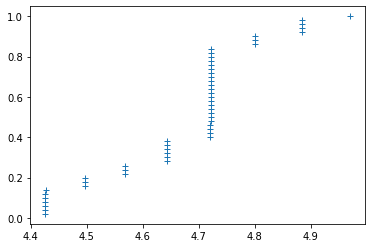

In [12]:
inputTest = ot.Sample.ImportFromCSVFile(RESULTS_FOLDER_PATH+'inputTest.csv')
outputTest  = ot.Sample.ImportFromCSVFile(RESULTS_FOLDER_PATH+'outputTest.csv')
empiricalCDF=[]
for x in outputTest:
    empiricalCDF.append(outputTest.computeEmpiricalCDF(x))
import matplotlib.pyplot as plt    
plt.figure()
plt.plot(outputTest,empiricalCDF,'+')

print(outputTest[1])

print(outputTest.computeQuantile(outputTest.computeEmpiricalCDF(outputTest[1])))

### STRATEGY 3

Metamodel degree 2

In [12]:
n = 11 # number of independt x variables
d = 2 # polynomial degree
n_sim2 = 3*int(np.math.factorial(n+d)/(np.math.factorial(n)*np.math.factorial(d)))
print(n_sim2)

234


In [6]:
#sparse metamodel using a sparse polynomial basis
multivariateBasis = ot.OrthogonalProductPolynomialFactory(distributionList)
totalDegree = 2
enumfunc = multivariateBasis.getEnumerateFunction()
P = enumfunc.getStrataCumulatedCardinal(totalDegree)
adaptiveStrategy = ot.FixedStrategy(multivariateBasis, P)
basisSequenceFactory = ot.LARS()
fittingAlgorithm = ot.CorrectedLeaveOneOut()
approximationAlgorithm = ot.LeastSquaresMetaModelSelectionFactory(
    basisSequenceFactory, fittingAlgorithm)

evaluationCoeffStrategy = ot.LeastSquaresStrategy(
    ot.MonteCarloExperiment(len(inputSample)), approximationAlgorithm)

chaosalgo_2 = ot.FunctionalChaosAlgorithm(
    inputSample, outputSample, distribution, adaptiveStrategy, evaluationCoeffStrategy)

chaosalgo_2.run()
results_2 = chaosalgo_2.getResult()
print('Model 2 - Basis size = ',len(np.array(results_2.getCoefficients())))

metamodel_2 = results_2.getMetaModel()

Model 2 - Basis size =  38


In [9]:
print(results_2.getComposedMetaModel())

4.67373 + 0.0111226 * (1.73205 * x0) - 0.0146516 * (1.73205 * x2) - 0.0186874 * (1.73205 * x3) - 0.0172172 * (1.73205 * x4) - 0.0125932 * (1.73205 * x5) + 0.0634526 * (1.73205 * x6) - 0.0118189 * (1.73205 * x7) - 0.0763692 * (1.73205 * x9) - 0.0137073 * (1.73205 * x10) + 0.0127949 * ((1.73205 * x3) * (1.73205 * x6)) + 0.0106977 * ((1.73205 * x3) * (1.73205 * x9)) + 0.00595923 * ((1.73205 * x4) * (1.73205 * x9)) + 0.0104007 * (-1.11803 + 3.3541 * x5^2) + 0.00618796 * ((1.73205 * x5) * (1.73205 * x6)) - 0.00926051 * ((1.73205 * x5) * (1.73205 * x8)) + 0.00675697 * ((1.73205 * x6) * (1.73205 * x7)) + 0.0341003 * ((1.73205 * x6) * (1.73205 * x9)) + 0.00864186 * ((1.73205 * x7) * (1.73205 * x9)) + 0.0175576 * (-1.11803 + 3.3541 * x9^2)


Metamodel degree 3

In [7]:
n = 11 # number of independt x variables
d = 3 # polynomial degree
n_sim3 = 3* int(np.math.factorial(n+d)/(np.math.factorial(n)*np.math.factorial(d)))
print(n_sim3)

1092


In [7]:
#sparse metamodel using a sparse polynomial basis
multivariateBasis = ot.OrthogonalProductPolynomialFactory(distributionList)
totalDegree = 3
enumfunc = multivariateBasis.getEnumerateFunction()
P = enumfunc.getStrataCumulatedCardinal(totalDegree)
adaptiveStrategy = ot.FixedStrategy(multivariateBasis, P)
basisSequenceFactory = ot.LARS()
fittingAlgorithm = ot.CorrectedLeaveOneOut()
approximationAlgorithm = ot.LeastSquaresMetaModelSelectionFactory(
    basisSequenceFactory, fittingAlgorithm)
evaluationCoeffStrategy = ot.LeastSquaresStrategy(
    ot.MonteCarloExperiment(len(inputSample)), approximationAlgorithm)
chaosalgo_3 = ot.FunctionalChaosAlgorithm(
    inputSample, outputSample, distribution, adaptiveStrategy, evaluationCoeffStrategy)
chaosalgo_3.run()
results_3 = chaosalgo_3.getResult()
print('Model 3 - Basis size = ',len(np.array(results_3.getCoefficients())))

metamodel_3 = results_3.getMetaModel()

Model 3 - Basis size =  48


In [7]:
print(results_3.getComposedMetaModel())

4.66153 + 0.0158863 * (1.73205 * x0) + 0.00690005 * (1.73205 * x1) - 0.0149085 * (1.73205 * x2) - 0.0249069 * (1.73205 * x3) - 0.0200657 * (1.73205 * x4) - 0.0188787 * (1.73205 * x5) + 0.0563937 * (1.73205 * x6) - 0.0186071 * (1.73205 * x7) + 0.018399 * (1.73205 * x8) - 0.0844368 * (1.73205 * x9) - 0.00657487 * (1.73205 * x10) - 0.00492171 * (-1.11803 + 3.3541 * x0^2) - 0.00132353 * ((1.73205 * x0) * (1.73205 * x2)) + 0.00468996 * ((1.73205 * x0) * (1.73205 * x3)) + 0.00687213 * ((1.73205 * x0) * (1.73205 * x5)) + 0.00264135 * ((1.73205 * x0) * (1.73205 * x6)) - 0.00375291 * ((1.73205 * x0) * (1.73205 * x9)) - 0.00536004 * (-1.11803 + 3.3541 * x1^2) + 0.00380502 * ((1.73205 * x1) * (1.73205 * x2)) - 0.0114376 * ((1.73205 * x1) * (1.73205 * x3)) + 0.00067363 * ((1.73205 * x1) * (1.73205 * x5)) - 0.00683277 * ((1.73205 * x1) * (1.73205 * x6)) - 0.00812864 * ((1.73205 * x1) * (1.73205 * x9)) + 0.00108059 * (-1.11803 + 3.3541 * x2^2) + 0.000493807 * ((1.73205 * x2) * (1.73205 * x3)) + 0.00

Metamodel degree 4

In [9]:
n = 11 # number of independt x variables
d = 4 # polynomial degree
n_sim4 = 3* int(np.math.factorial(n+d)/(np.math.factorial(n)*np.math.factorial(d)))
print(n_sim4)

4095


In [8]:
#sparse metamodel using a sparse polynomial basis
multivariateBasis = ot.OrthogonalProductPolynomialFactory(distributionList)
totalDegree = 4
enumfunc = multivariateBasis.getEnumerateFunction()
P = enumfunc.getStrataCumulatedCardinal(totalDegree)
adaptiveStrategy = ot.FixedStrategy(multivariateBasis, P)
basisSequenceFactory = ot.LARS()
fittingAlgorithm = ot.CorrectedLeaveOneOut()
approximationAlgorithm = ot.LeastSquaresMetaModelSelectionFactory(
    basisSequenceFactory, fittingAlgorithm)

evaluationCoeffStrategy = ot.LeastSquaresStrategy(
    ot.MonteCarloExperiment(len(inputSample)), approximationAlgorithm)

chaosalgo_4 = ot.FunctionalChaosAlgorithm(
    inputSample, outputSample, distribution, adaptiveStrategy, evaluationCoeffStrategy)

chaosalgo_4.run()
results_4 = chaosalgo_4.getResult()
print('Model 4 - Basis size = ',len(np.array(results_4.getCoefficients())))

metamodel_4 = results_4.getMetaModel()

Model 4 - Basis size =  72


In [10]:
print(results_4.getComposedMetaModel())

4.66286 + 0.00981243 * (1.73205 * x0) + 0.00235241 * (1.73205 * x1) - 0.0189821 * (1.73205 * x2) - 0.0151364 * (1.73205 * x3) - 0.0173961 * (1.73205 * x4) - 0.0190858 * (1.73205 * x5) + 0.0589893 * (1.73205 * x6) - 0.0132789 * (1.73205 * x7) + 0.00914285 * (1.73205 * x8) - 0.0669366 * (1.73205 * x9) - 0.0136271 * (1.73205 * x10) - 0.000938377 * (-1.11803 + 3.3541 * x0^2) - 0.00726696 * ((1.73205 * x0) * (1.73205 * x1)) - 0.00116006 * ((1.73205 * x0) * (1.73205 * x6)) - 0.00740589 * ((1.73205 * x0) * (1.73205 * x9)) + 0.00146944 * ((1.73205 * x1) * (1.73205 * x3)) - 0.00632235 * ((1.73205 * x1) * (1.73205 * x6)) - 0.00688815 * ((1.73205 * x1) * (1.73205 * x9)) - 0.00648559 * (-1.11803 + 3.3541 * x2^2) + 0.00732641 * ((1.73205 * x2) * (1.73205 * x6)) - 0.0029603 * ((1.73205 * x2) * (1.73205 * x7)) + 0.0107054 * ((1.73205 * x2) * (1.73205 * x9)) + 0.000608176 * (-1.11803 + 3.3541 * x3^2) + 0.00588104 * ((1.73205 * x3) * (1.73205 * x4)) + 0.0129333 * ((1.73205 * x3) * (1.73205 * x6)) - 0.0

Metamodel degree 6

In [11]:
n = 11 # number of independt x variables
d = 6 # polynomial degree
n_sim6 = 3* int(np.math.factorial(n+d)/(np.math.factorial(n)*np.math.factorial(d)))
print(n_sim6)

37128


In [9]:
#sparse metamodel using a sparse polynomial basis
multivariateBasis = ot.OrthogonalProductPolynomialFactory(distributionList)
totalDegree = 6
enumfunc = multivariateBasis.getEnumerateFunction()
P = enumfunc.getStrataCumulatedCardinal(totalDegree)
adaptiveStrategy = ot.FixedStrategy(multivariateBasis, P)
basisSequenceFactory = ot.LARS()
fittingAlgorithm = ot.CorrectedLeaveOneOut()
approximationAlgorithm = ot.LeastSquaresMetaModelSelectionFactory(
    basisSequenceFactory, fittingAlgorithm)
evaluationCoeffStrategy = ot.LeastSquaresStrategy(
    ot.MonteCarloExperiment(len(inputSample)), approximationAlgorithm)
chaosalgo_6 = ot.FunctionalChaosAlgorithm(
    inputSample, outputSample, distribution, adaptiveStrategy, evaluationCoeffStrategy)
chaosalgo_6.run()
results_6 = chaosalgo_6.getResult()
print('Model 6 - Basis size = ',len(np.array(results_6.getCoefficients())))

metamodel_6 = results_6.getMetaModel()

Model 6 - Basis size =  188


Metamodel degree 8

In [13]:
n = 11 # number of independt x variables
d = 8 # polynomial degree
n_sim8 = 3* int(np.math.factorial(n+d)/(np.math.factorial(n)*np.math.factorial(d)))
print(n_sim8)

226746


In [10]:
#sparse metamodel using a sparse polynomial basis
multivariateBasis = ot.OrthogonalProductPolynomialFactory(distributionList)
totalDegree = 8
enumfunc = multivariateBasis.getEnumerateFunction()
P = enumfunc.getStrataCumulatedCardinal(totalDegree)
adaptiveStrategy = ot.FixedStrategy(multivariateBasis, P)
basisSequenceFactory = ot.LARS()
fittingAlgorithm = ot.CorrectedLeaveOneOut()
approximationAlgorithm = ot.LeastSquaresMetaModelSelectionFactory(
    basisSequenceFactory, fittingAlgorithm)
evaluationCoeffStrategy = ot.LeastSquaresStrategy(
    ot.MonteCarloExperiment(len(inputSample)), approximationAlgorithm)
chaosalgo_8 = ot.FunctionalChaosAlgorithm(
    inputSample, outputSample, distribution, adaptiveStrategy, evaluationCoeffStrategy)
chaosalgo_8.run()
results_8 = chaosalgo_8.getResult()
print('Model 8 - Basis size = ',len(np.array(results_8.getCoefficients())))

metamodel_8 = results_8.getMetaModel()

Model 8 - Basis size =  131


## PCE metamodel validation

Comparison of the 3 created metamodels using a  validation set to compute the predictive error: the lowest is the error, the closest to 1 is the predictive factor $Q_2$

In [6]:
n_valid =50
inputTest = distribution.getSample(n_valid)
outputTest = np.zeros((n_valid,))
BF_pax_list = np.zeros((n_valid,))
payload_list =np.zeros((n_valid,))
BF_pax_cont_list= np.zeros((n_valid,))
max_payload_list=np.zeros((n_valid,))
BF_list=np.zeros((n_valid,))
H2_tank_length_list=np.zeros((n_valid,))
H2_tank_volume_list= np.zeros((n_valid,))
H2_tank_diam_list = np.zeros((n_valid,))
for i in range(n_valid):
    inputs = inputTest[i]
    
    results= fast_launcher(inputs)
    print(i, results)

    BF_pax_list[i]      = results[0]
    payload_list[i]     = results[1]
    BF_pax_cont_list[i] = results[2]
    max_payload_list[i] = results[3]
    BF_list[i]          = results[4]
    H2_tank_length_list[i] = results[5]
    H2_tank_volume_list[i] = results[6]
    H2_tank_diam_list[i] = results[7]


output_sample= BF_pax_list.reshape((n_valid,1))
outputTest = ot.Sample(output_sample)

output_sample1= payload_list.reshape((n_valid,1))
outputTest1 = ot.Sample(output_sample1)

output_sample2= BF_pax_cont_list.reshape((n_valid,1))
outputTest2 = ot.Sample(output_sample2)

output_sample3= max_payload_list.reshape((n_valid,1))
outputTest3 = ot.Sample(output_sample3)

output_sample4= BF_list.reshape((n_valid,1))
outputTest4 = ot.Sample(output_sample4)

output_sample5= H2_tank_length_list.reshape((n_valid,1))
outputTest5 = ot.Sample(output_sample5)

output_sample6= H2_tank_volume_list.reshape((n_valid,1))
outputTest6 = ot.Sample(output_sample6)

output_sample7= H2_tank_diam_list.reshape((n_valid,1))
outputTest7 = ot.Sample(output_sample7)




#export samples
inputTest.exportToCSVFile(RESULTS_FOLDER_PATH+'inputTest.csv')
outputTest.exportToCSVFile(RESULTS_FOLDER_PATH+'outputTest.csv')
outputTest1.exportToCSVFile(RESULTS_FOLDER_PATH+'outputTest1.csv')        
outputTest2.exportToCSVFile(RESULTS_FOLDER_PATH+'outputTest2.csv')
outputTest3.exportToCSVFile(RESULTS_FOLDER_PATH+'outputTest3.csv')  
outputTest4.exportToCSVFile(RESULTS_FOLDER_PATH+'outputTest4.csv')
outputTest5.exportToCSVFile(RESULTS_FOLDER_PATH+'outputTest5.csv')          
outputTest6.exportToCSVFile(RESULTS_FOLDER_PATH+'outputTest6.csv')
outputTest7.exportToCSVFile(RESULTS_FOLDER_PATH+'outputTest7.csv')  

no previous fail to remove
-------------------------------------------
-------------------------------------------
-------------------------------------------
-------------------------------------------
-------------------------------------------
-------------------------------------------
speeds found
TODn =  0.0 1.15*TODn =  0.0
VR =  0.0
TO_power  [1907.13278774] BFL  [1279.35492954]
start main mission [23572.]
END main mission [23572.]
Cruise mach is greater then max cruise mach. Max cruise mach will be used in cruise 0.3900572296079112
Cruise mach is greater then max cruise mach. Max cruise mach will be used in cruise 0.3900572296079112
Cruise mach is greater then max cruise mach. Max cruise mach will be used in cruise 0.3900572296079112
NL: NLBGSSolver 'NL: NLBGS' on system '': residuals contain 'inf' or 'NaN' after 1 iterations.
0 (array([4.42625238]), array([6080.]), array([4.35177656]), array([6184.05244404]), array([283.28015204]), array([2.9102616]), array([5.58828324]), arr

Cruise mach is greater then max cruise mach. Max cruise mach will be used in cruise 0.39004808397080437
Cruise mach is greater then max cruise mach. Max cruise mach will be used in cruise 0.39004808397080437
NL: NLBGSSolver 'NL: NLBGS' on system '': residuals contain 'inf' or 'NaN' after 1 iterations.
7 (array([4.72145281]), array([5700.]), array([4.64591709]), array([5792.6735535]), array([283.28716874]), array([3.2846535]), array([5.43779303]), array([1.55613088]))
no previous fail to remove
-------------------------------------------
-------------------------------------------
-------------------------------------------
-------------------------------------------
-------------------------------------------
-------------------------------------------
speeds found
TODn =  0.0 1.15*TODn =  0.0
VR =  0.0
TO_power  [1907.13278774] BFL  [1279.35492954]
start main mission [23572.]
END main mission [23572.]
Cruise mach is greater then max cruise mach. Max cruise mach will be used in cruise 

start main mission [23572.]
END main mission [23572.]
Cruise mach is greater then max cruise mach. Max cruise mach will be used in cruise 0.3900265499009547
Cruise mach is greater then max cruise mach. Max cruise mach will be used in cruise 0.3900265499009547
Cruise mach is greater then max cruise mach. Max cruise mach will be used in cruise 0.3900265499009547
NL: NLBGSSolver 'NL: NLBGS' on system '': residuals contain 'inf' or 'NaN' after 1 iterations.
15 (array([4.49688392]), array([5985.]), array([4.47173085]), array([6018.66506465]), array([283.30368689]), array([2.93379928]), array([5.08317265]), array([1.52052008]))
no previous fail to remove
-------------------------------------------
-------------------------------------------
-------------------------------------------
-------------------------------------------
-------------------------------------------
-------------------------------------------
speeds found
TODn =  0.0 1.15*TODn =  0.0
VR =  0.0
TO_power  [1907.13278774] B

no previous fail to remove
-------------------------------------------
-------------------------------------------
-------------------------------------------
-------------------------------------------
-------------------------------------------
-------------------------------------------
speeds found
TODn =  0.0 1.15*TODn =  0.0
VR =  0.0
TO_power  [1907.13278774] BFL  [1279.35492954]
start main mission [23572.]
END main mission [23572.]
Cruise mach is greater then max cruise mach. Max cruise mach will be used in cruise 0.3900519390925689
Cruise mach is greater then max cruise mach. Max cruise mach will be used in cruise 0.3900519390925689
Cruise mach is greater then max cruise mach. Max cruise mach will be used in cruise 0.3900519390925689
NL: NLBGSSolver 'NL: NLBGS' on system '': residuals contain 'inf' or 'NaN' after 1 iterations.
23 (array([4.72140352]), array([5700.]), array([4.68619884]), array([5742.82077732]), array([283.28421114]), array([3.25889978]), array([5.50122516]), a

Cruise mach is greater then max cruise mach. Max cruise mach will be used in cruise 0.39003553098356175
Cruise mach is greater then max cruise mach. Max cruise mach will be used in cruise 0.39003553098356175
NL: NLBGSSolver 'NL: NLBGS' on system '': residuals contain 'inf' or 'NaN' after 1 iterations.
30 (array([4.42651247]), array([6080.]), array([4.32332941]), array([6225.10876936]), array([283.29679822]), array([2.7555783]), array([5.23124425]), array([1.53575334]))
no previous fail to remove
-------------------------------------------
-------------------------------------------
-------------------------------------------
-------------------------------------------
-------------------------------------------
-------------------------------------------
speeds found
TODn =  0.0 1.15*TODn =  0.0
VR =  0.0
TO_power  [1907.13278774] BFL  [1279.35492954]
start main mission [23572.]
END main mission [23572.]
Cruise mach is greater then max cruise mach. Max cruise mach will be used in cruis

END main mission [23572.]
Cruise mach is greater then max cruise mach. Max cruise mach will be used in cruise 0.3900423263316808
Cruise mach is greater then max cruise mach. Max cruise mach will be used in cruise 0.3900423263316808
Cruise mach is greater then max cruise mach. Max cruise mach will be used in cruise 0.3900423263316808
NL: NLBGSSolver 'NL: NLBGS' on system '': residuals contain 'inf' or 'NaN' after 1 iterations.
38 (array([4.72152643]), array([5700.]), array([4.44042128]), array([6060.84399313]), array([283.29158575]), array([3.66432764]), array([5.34306607]), array([1.54681705]))
no previous fail to remove
-------------------------------------------
-------------------------------------------
-------------------------------------------
-------------------------------------------
-------------------------------------------
-------------------------------------------
speeds found
TODn =  0.0 1.15*TODn =  0.0
VR =  0.0
TO_power  [1907.13278774] BFL  [1279.35492954]
start ma

no previous fail to remove
-------------------------------------------
-------------------------------------------
-------------------------------------------
-------------------------------------------
-------------------------------------------
-------------------------------------------
speeds found
TODn =  0.0 1.15*TODn =  0.0
VR =  0.0
TO_power  [1907.13278774] BFL  [1279.35492954]
start main mission [23572.]
END main mission [23572.]
Cruise mach is greater then max cruise mach. Max cruise mach will be used in cruise 0.3900321694255425
Cruise mach is greater then max cruise mach. Max cruise mach will be used in cruise 0.3900321694255425
Cruise mach is greater then max cruise mach. Max cruise mach will be used in cruise 0.3900321694255425
NL: NLBGSSolver 'NL: NLBGS' on system '': residuals contain 'inf' or 'NaN' after 1 iterations.
46 (array([4.88447201]), array([5510.]), array([4.82424018]), array([5578.79370817]), array([283.29937666]), array([2.57264382]), array([5.17581892]), a

In [11]:


inputTest = ot.Sample.ImportFromCSVFile(RESULTS_FOLDER_PATH+'inputTest.csv')
outputTest  = ot.Sample.ImportFromCSVFile(RESULTS_FOLDER_PATH+'outputTest.csv')  

display(inputTest)
display(outputTest)

#val_1 = ot.MetaModelValidation(inputTest, outputTest, metamodel_1)
val_2 = ot.MetaModelValidation(inputTest, outputTest, metamodel_2)
val_3 = ot.MetaModelValidation(inputTest, outputTest, metamodel_3)
val_4 = ot.MetaModelValidation(inputTest, outputTest, metamodel_4)
val_6 = ot.MetaModelValidation(inputTest, outputTest, metamodel_6)
val_8 = ot.MetaModelValidation(inputTest, outputTest, metamodel_8)

#Q2_1 = val_1.computePredictivityFactor()
Q2_2 = val_2.computePredictivityFactor()
Q2_3 = val_3.computePredictivityFactor()
Q2_4 = val_4.computePredictivityFactor()
Q2_6 = val_6.computePredictivityFactor()
Q2_8 = val_8.computePredictivityFactor()

#print('model 1', Q2_1)
print('model 2', Q2_2)
print('model 3', Q2_3)
print('model 4', Q2_4)
print('model 6', Q2_6)
print('model 8', Q2_8)

class=Sample name=workdir/TPAD_hybrid_uncertainty_HTPEM_hyb_desc/inputTest.csv implementation=class=SampleImplementation name=workdir/TPAD_hybrid_uncertainty_HTPEM_hyb_desc/inputTest.csv size=50 dimension=11 description=[X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10] data=[[38.8963,38.6884,0.975065,6755.98,0.956451,10470.5,0.926131,0.959223,0.802043,1.17687,0.97538],[46.4842,55.1866,0.97572,8953.09,0.996222,14526.2,1.00059,0.888356,0.847141,1.18486,0.992931],[24.0583,53.2061,0.995586,7466.63,0.976211,11921,1.17325,0.759098,1.05959,0.929327,0.952043],[20.9751,48.6835,0.986006,6572.39,0.999265,9367.86,1.18848,0.76225,0.893161,0.926114,1.00117],[30.4117,57.8398,0.97935,8628.84,0.999438,13983.9,0.88608,0.999023,0.89028,1.15181,0.998152],[49.0827,59.644,0.991231,5046.5,0.965517,8501.9,0.94573,0.70043,0.947686,0.994525,1.04787],[47.6204,67.4728,0.985608,7787.71,0.961568,14162.6,1.08558,0.79397,0.834843,1.02354,1.02251],[35.0912,64.8579,0.957435,9611.33,0.972237,12439.7,1.05521,0.705994,1.03825,0.944822,1.00505],[21.8962,45.7272,0.991203,6728.75,0.959193,14472.2,1.14642,0.715451,0.890618,0.969468,1.02677],[28.7827,55.1699,0.977993,8825.4,0.950406,9867.4,0.992894,0.760003,0.918358,0.964133,1.00697],[41.4315,66.5412,0.98267,8080.71,0.960804,8578.13,0.827725,0.708608,0.93018,1.03534,1.0129],[31.5009,66.536,0.950997,5895.27,0.979914,14903.1,0.997145,0.868608,1.12443,0.900824,1.02117],[31.213,36.3754,0.986128,6893.48,0.982438,12660.7,0.835246,0.901049,0.955004,0.918162,1.04723],[42.118,51.7775,0.987225,5395.44,0.992809,11336.2,1.01218,0.867929,0.93441,0.824676,0.988338],[46.5051,38.1461,0.964297,7823.37,0.954158,9884.39,1.16349,0.877869,1.10339,0.854548,1.02165],[28.8498,64.2318,0.992888,6189.89,0.972693,14212.3,0.964572,0.883313,0.926568,0.983302,1.03834],[47.8553,47.4031,0.976234,8355.94,0.97526,13982.4,0.861658,0.83911,1.00839,0.896055,1.04093],[44.6243,44.4666,0.997793,8290.22,0.951022,9563.3,0.979414,0.81031,1.19558,0.99662,0.955112],[40.5372,30.0843,0.962317,7214.39,0.958655,14971,0.879812,0.968195,1.10821,1.16567,1.02217],[44.8408,39.5773,0.961308,8723.87,0.959258,9494.46,1.01105,0.973938,1.05789,1.04423,1.03778],[30.7941,40.2063,0.997823,9266.11,0.992289,8765.21,0.997323,0.736509,0.980537,1.1895,1.03349],[48.6424,53.6614,0.980173,6206.01,0.975139,9798.81,0.916513,0.730099,1.09266,1.04718,1.00493],[37.6585,36.7687,0.974513,5181.72,0.963582,14594.3,0.94412,0.748048,0.915222,0.802908,1.02969],[25.4612,69.0934,0.971955,7273.67,0.982064,7381.84,1.04276,0.922905,1.16081,0.936334,0.9685],[22.5735,49.3197,0.95652,9074.99,0.978186,7633.06,1.02227,0.744322,1.00776,1.19605,0.959944],[39.8218,58.3723,0.996367,9695.15,0.952764,7485.53,1.02081,0.902259,0.948885,0.861281,1.04074],[26.3133,68.3178,0.955075,9244.43,0.990056,7380.54,1.04013,0.772065,1.0999,0.816661,0.974966],[31.5869,58.1207,0.966289,7211.7,0.9573,10160.6,1.1615,0.868449,0.821959,1.03437,0.971491],[20.7368,62.8071,0.970022,6604.64,0.989019,13971.2,0.887294,0.847894,1.16378,0.934284,0.98544],[32.5676,49.2752,0.970283,6258.3,0.980267,7062.07,1.01388,0.885686,0.985907,0.818944,0.960524],[49.4552,38.2627,0.969949,7725.07,0.969207,14706.6,0.896991,0.876485,1.05614,1.19725,1.03567],[47.484,60.0478,0.994706,5030.16,0.973107,8203.35,0.969282,0.926975,0.859152,0.810153,1.00189],[48.6681,67.0212,0.95581,9300.67,0.956309,13146.3,0.855998,0.83083,0.858013,1.09064,0.953991],[34.1885,55.4369,0.960781,6757.87,0.95706,11160.2,1.13466,0.75413,0.834191,0.928926,0.971103],[27.7958,54.0865,0.956126,8865.98,0.988335,9699.52,1.18201,0.839549,1.18546,1.12459,1.02198],[39.8402,58.0602,0.957366,8040.45,0.959975,13558.1,1.11943,0.756722,1.12342,1.03882,0.966495],[34.6932,33.1766,0.96742,7406.43,0.967909,10270.1,1.10293,0.900154,0.920243,1.13977,1.04985],[34.0557,40.0933,0.976228,9012.98,0.985535,7097.51,1.04654,0.904372,0.909296,0.948633,1.00828],[23.3323,57.079,0.95712,8126.43,0.999405,11029.2,1.18427,0.702255,1.1601,1.12046,0.995911],[30.3596,44.3381,0.964623,8677.43,0.991234,9353.14,0.81972,0.759938,0.810309,1.10368

class=Sample name=workdir/TPAD_hybrid_uncertainty_HTPEM_hyb_desc/outputTest.csv implementation=class=SampleImplementation name=workdir/TPAD_hybrid_uncertainty_HTPEM_hyb_desc/outputTest.csv size=50 dimension=1 description=[data_0] data=[[4.42625],[4.42648],[4.72141],[4.72166],[4.42653],[4.72173],[4.72159],[4.72145],[4.72162],[4.64405],[4.64414],[4.72152],[4.49693],[4.80162],[4.8015],[4.49688],[4.64428],[4.64392],[4.42639],[4.72154],[4.42669],[4.64416],[4.8844],[4.7214],[4.72128],[4.72167],[4.96989],[4.72128],[4.64409],[4.88416],[4.42651],[4.88441],[4.56886],[4.72126],[4.72158],[4.72123],[4.72165],[4.7216],[4.72153],[4.42636],[4.80136],[4.56918],[4.72139],[4.56944],[4.72161],[4.72168],[4.88447],[4.72158],[4.7214],[4.49669]]

model 2 [0.852236]
model 3 [0.884816]
model 4 [0.878589]
model 6 [0.8339]
model 8 [0.844463]


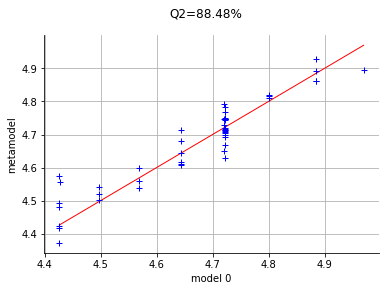

In [12]:
import openturns.viewer as viewer

graph = val_3.drawValidation()
graph.setTitle("Q2=%.2f%%" % (Q2_3[0]*100))
view = viewer.View(graph)

# Computation of the sensitivity indices

In [13]:
#SI_1 = ot.FunctionalChaosSobolIndices(results_1)
SI_2 = ot.FunctionalChaosSobolIndices(results_2)
SI_3 = ot.FunctionalChaosSobolIndices(results_3)
SI_4 = ot.FunctionalChaosSobolIndices(results_4)

#print('Indices with model 1')
#print( SI_1.summary())
#print ('######################')
print('Indices with model 2')
print( SI_2.summary())
print ('######################')
print('Indices with model 3')
print(SI_3.summary())
print('Indices with model 4')
print(SI_4.summary())

Indices with model 2
 input dimension: 11
 output dimension: 1
 basis size: 38
 mean: [4.66815]
 std-dev: [0.117135]
------------------------------------------------------------
Index   | Multi-indice                  | Part of variance  
------------------------------------------------------------
     10 | [0,0,0,0,0,0,0,0,0,1,0]       | 0.326418
      7 | [0,0,0,0,0,0,1,0,0,0,0]       | 0.261885
     32 | [0,0,0,0,0,0,1,0,0,1,0]       | 0.118744
     36 | [0,0,0,0,0,0,0,0,0,2,0]       | 0.0370492
      4 | [0,0,0,1,0,0,0,0,0,0,0]       | 0.0287318
      8 | [0,0,0,0,0,0,0,1,0,0,0]       | 0.0284139
     11 | [0,0,0,0,0,0,0,0,0,0,1]       | 0.0238443
      3 | [0,0,1,0,0,0,0,0,0,0,0]       | 0.0213428
      6 | [0,0,0,0,0,1,0,0,0,0,0]       | 0.0206159
      5 | [0,0,0,0,1,0,0,0,0,0,0]       | 0.0205665
      1 | [1,0,0,0,0,0,0,0,0,0,0]       | 0.016016
     21 | [0,0,0,1,0,0,1,0,0,0,0]       | 0.0115569
------------------------------------------------------------


-----------------

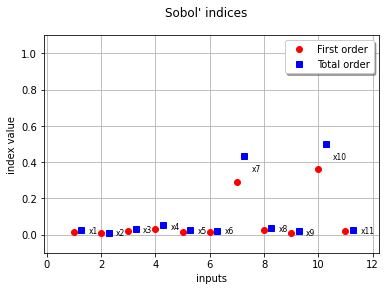

In [14]:
import openturns.viewer as viewer

dim_input = 11
first_order = [SI_3.getSobolIndex(i) for i in range(dim_input)]
total_order = [SI_3.getSobolTotalIndex(i) for i in range(dim_input)]
#input_names = im.model.getInputDescription()
input_names = ['x1', 'x2','x3','x4', 'x5','x6','x7', 'x8','x9','x10', 'x11']

graph = ot.SobolIndicesAlgorithm.DrawSobolIndices(
    input_names, first_order, total_order)
view = viewer.View(graph)

# 2. Bootstrap technique to compute error


## 2.2 Fixed database only once and reused with different training and validation set (Bootstrap approach)

In [15]:
inputDim = 11
repet = 20
input_names = ['x1', 'x2','x3','x4', 'x5','x6','x7', 'x8','x9','x10', 'x11']

#database size
N = len(inputSample)
X=np.array(inputSample)
Y=np.array(outputSample)

#Initialization
L_First_Order = []
L_Total_Index = []

multivariateBasis = ot.OrthogonalProductPolynomialFactory(distributionList)
totalDegree = 3
enumfunc = multivariateBasis.getEnumerateFunction()
P = enumfunc.getStrataCumulatedCardinal(totalDegree)
adaptiveStrategy = ot.FixedStrategy(multivariateBasis, P)    

In [16]:


#to choose randomly  the training set for the bootstrap  
for j in range(repet):
    print('J',j)
    Ind_train = np.random.choice(N,N,replace=True)
    #to choose the training set associated 
    X_train = X[Ind_train,:]
    Y_train = Y[Ind_train].reshape((N,1))	


    basisSequenceFactory = ot.LARS()
    
    fittingAlgorithm = ot.CorrectedLeaveOneOut()
    
    approximationAlgorithm = ot.LeastSquaresMetaModelSelectionFactory(
    basisSequenceFactory, fittingAlgorithm)
    
    evaluationCoeffStrategy = ot.LeastSquaresStrategy(
    ot.MonteCarloExperiment(N), approximationAlgorithm)
    chaosalgo_3 = ot.FunctionalChaosAlgorithm(
    X_train, Y_train, distribution, adaptiveStrategy, evaluationCoeffStrategy)
    chaosalgo_3.run()
    
    #Get the result:
    results = chaosalgo_3.getResult()
    sensitivityAnalysis = ot.FunctionalChaosSobolIndices(results)
    responseSurface = results.getMetaModel()
  
    sensitivityAnalysis = ot.FunctionalChaosSobolIndices(results)
    first_order = list(map(lambda i: sensitivityAnalysis.getSobolIndex(i), range(inputDim)))
    total_index = list(map(lambda i: sensitivityAnalysis.getSobolTotalIndex(i), range(inputDim)))
         
       
    L_First_Order.append(first_order)
    L_Total_Index.append(total_index)

J 0
J 1
J 2
J 3
J 4
J 5
J 6
J 7
J 8
J 9
J 10
J 11
J 12
J 13
J 14
J 15
J 16
J 17
J 18
J 19


In [17]:
#######post process
L_First_Order = np.array(L_First_Order)
L_Total_Index = np.array(L_Total_Index)



j=0
mean = L_First_Order[j*repet:(j+1)*repet].mean(axis = 0)
std =  L_First_Order[j*repet:(j+1)*repet].std(axis = 0)
cv = std/mean
print("###########################\n")
    
print("Sobol index, first order (coefficient of variation \%)\n")
for i in range(inputDim):
        print(input_names[i]+' : '+str(mean[i])+' ('+str(cv[i]*100)+'\%) \n')
print("First order sum = "+str(np.array(mean).sum())+'\n')
mean = L_Total_Index[j*repet:(j+1)*repet].mean(axis = 0)
std =  L_Total_Index[j*repet:(j+1)*repet].std(axis = 0)
cv = std/mean      
print("Total Sobol index (coefficient of variation \%):\n")
for i in range(inputDim):
        print(input_names[i]+' : '+str(mean[i])+' ('+str(cv[i]*100)+'\%) \n')
print("Total Sobol index sum = "+str(np.array(mean).sum())+"\n")



###########################

Sobol index, first order (coefficient of variation \%)

x1 : 0.014710590066987028 (16.40164213894721\%) 

x2 : 0.005510048461735565 (34.070991955799926\%) 

x3 : 0.021053342585964287 (20.13177496703245\%) 

x4 : 0.03240349184111331 (14.84928554659766\%) 

x5 : 0.016481391824323684 (15.058544285774666\%) 

x6 : 0.01597195909787536 (19.412655301337697\%) 

x7 : 0.2779614557299982 (4.331800098158617\%) 

x8 : 0.025099742245667828 (16.700110570948073\%) 

x9 : 0.007877973529732154 (25.27326348135291\%) 

x10 : 0.3544396949395593 (2.538135006361914\%) 

x11 : 0.020040479416982802 (16.515004590743406\%) 

First order sum = 0.7915501697399394

Total Sobol index (coefficient of variation \%):

x1 : 0.028540162345804355 (14.356338508869735\%) 

x2 : 0.016435038796309427 (23.45620242287937\%) 

x3 : 0.03624208211686391 (15.222821080934285\%) 

x4 : 0.06155953506007276 (6.0455713772599475\%) 

x5 : 0.03116658228563466 (14.444614109973408\%) 

x6 : 0.02852788514163208 

It can be seen that bootstrap approach offers a correct approximation of the variance of the PCE estimator of the Sobol indices with a design of experiments of size only $N$

## Try to do the same test and increase the value of N in order to decrease the coefficient of variation